# Part A

In [33]:
import roboticstoolbox as rtb
import spatialmath as sm
import spatialgeometry as sg
from sympy import symbols, deg

## Question 1

Find the rotation matrix representation of ZYX (RAR) from the given angles $\alpha$, $\beta$ and $\gamma$ about Z, Y and X axis respectively? Also find the expressions for inverse case, i.e., angles given a rotation matrix.

### Answer: (Manual)

R_z = \begin{equation}
\begin{pmatrix}
  cos\alpha   &-sin\alpha   &0  \\
  sin\alpha   &cos\alpha   &0 \\
  0 &0 &1\\
\end{pmatrix}
\end{equation}

R_y = \begin{equation}
\begin{pmatrix}
  cos\beta   &0   &sin\beta  \\
  0   &1   &0 \\
  -sin\beta &0 &cos\beta \\
\end{pmatrix}
\end{equation}

R_x = \begin{equation}
\begin{pmatrix}
  0   &0   &1  \\
  0   &cos\gamma   &-sin\gamma \\
  0 &sin\gamma &cos\gamma \\
\end{pmatrix}
\end{equation}

R_z * R_y * R_x = \begin{equation}
\begin{pmatrix}
  cos\alpha   &-sin\alpha   &0  \\
  sin\alpha   &cos\alpha   &0 \\
  0 &0 &1\\
\end{pmatrix} * \begin{pmatrix}
  cos\beta   &0   &sin\beta  \\
  0   &1   &0 \\
  -sin\beta &0 &cos\beta \\
\end{pmatrix} * \begin{pmatrix}
  0   &0   &1  \\
  0   &cos\gamma   &-sin\gamma \\
  0 &sin\gamma &cos\gamma \\
\end{pmatrix}
\end{equation}

R_z * R_y * R_x = \begin{equation}
\begin{pmatrix}
\cos(\alpha) \cos(\beta) \cos(\gamma) - \sin(\alpha) \sin(\gamma) & -\cos(\alpha) \cos(\beta) \sin(\gamma) - \sin(\alpha) \cos(\gamma) & -\cos(\alpha) \sin(\beta) \\
\sin(\alpha) \cos(\beta) \cos(\gamma) + \cos(\alpha) \sin(\gamma) & \sin(\alpha) \cos(\beta) \sin(\gamma) - \cos(\alpha) \cos(\gamma) & -\sin(\alpha) \sin(\beta) \\
\sin(\beta) \cos(\gamma) & \sin(\beta) \sin(\gamma) & \cos(\beta)
\end{pmatrix}
\end{equation}

The inverse will be: \begin{pmatrix}
\cos(\beta) \cos(\gamma) & -\sin(\alpha) \sin(\beta) \cos(\gamma) + \cos(\alpha) \sin(\gamma) & \sin(\alpha) \cos(\beta) \sin(\gamma) + \cos(\alpha) \cos(\gamma) \\
\cos(\beta) \sin(\gamma) & \sin(\alpha) \sin(\beta) \sin(\gamma) + \cos(\alpha) \cos(\gamma) & \sin(\alpha) \cos(\beta) \cos(\gamma) - \cos(\alpha) \sin(\gamma) \\
-\sin(\beta) & \sin(\alpha) \cos(\beta) & \cos(\alpha) \cos(\beta)
\end{pmatrix}

### Answer: (Code)

In [36]:
alpha, beta, gamma = symbols('alpha beta gamma')

R_z = sm.SO3.Rx(alpha)
R_y = sm.SO3.Ry(beta)
R_x = sm.SO3.Rz(gamma)

R = R_x * R_y * R_z

print("Rotation matrix ZYX (RAR):")
print(R)

R_inv = R.inv()

print("\nInverse rotation matrix:")
print(R_inv)

Rotation matrix ZYX (RAR):
  cos(beta)*cos(gamma) sin(alpha)*sin(beta)*cos(gamma) - sin(gamma)*cos(alpha) sin(alpha)*sin(gamma) + sin(beta)*cos(alpha)*cos(gamma)  
  sin(gamma)*cos(beta) sin(alpha)*sin(beta)*sin(gamma) + cos(alpha)*cos(gamma) -sin(alpha)*cos(gamma) + sin(beta)*sin(gamma)*cos(alpha)  
  -sin(beta)   sin(alpha)*cos(beta) cos(alpha)*cos(beta)  


Inverse rotation matrix:
  cos(beta)*cos(gamma) sin(gamma)*cos(beta) -sin(beta)    
  sin(alpha)*sin(beta)*cos(gamma) - sin(gamma)*cos(alpha) sin(alpha)*sin(beta)*sin(gamma) + cos(alpha)*cos(gamma) sin(alpha)*cos(beta)  
  sin(alpha)*sin(gamma) + sin(beta)*cos(alpha)*cos(gamma) -sin(alpha)*cos(gamma) + sin(beta)*sin(gamma)*cos(alpha) cos(alpha)*cos(beta)  



## Question 2

Find the rotation matrix at $\beta$ = -90 degrees for XYZ (FAR).

### Answer: (Manual)

R_x = \begin{equation}
\begin{pmatrix}
  0   &0   &1  \\
  0   &cos\gamma   &-sin\gamma \\
  0 &sin\gamma &cos\gamma \\
\end{pmatrix}
\end{equation}

R_y = 
\begin{equation}
\begin{pmatrix}
  cos90   &0   &sin90  \\
  0   &1   &0 \\
  -sin90 &0 &cos90 \\
\end{pmatrix}
\end{equation}

=
\begin{pmatrix}
0 &0 &1 \\
0 &1 &0 \\
-1 &0 &0 \\
\end{pmatrix}

R_z = \begin{equation}
\begin{pmatrix}
  cos\alpha   &-sin\alpha   &0  \\
  sin\alpha   &cos\alpha   &0 \\
  0 &0 &1\\
\end{pmatrix}
\end{equation}

R = \begin{equation}
\begin{bmatrix}
\cos\gamma & -\sin\gamma & 0 \\
\sin\gamma & \cos\gamma & 0 \\
0 & 0 & 1
\end{bmatrix} * \begin{bmatrix}
0 & 0 & -1 \\
0 & 1 & 0 \\
1 & 0 & 0
\end{bmatrix} * \begin{bmatrix}
1 & 0 & 0 \\
0 & \cos\alpha & -\sin\alpha \\
0 & \sin\alpha & \cos\alpha
\end{bmatrix}
\end{equation}

R = \begin{bmatrix}
\cos\gamma & 0 & -\sin\gamma \\
\sin\gamma\sin\alpha & \cos\alpha & -\cos\gamma\sin\alpha \\
\sin\gamma\cos\alpha & -\sin\alpha & \cos\gamma\cos\alpha
\end{bmatrix}

### Answer: (Code)

In [37]:
import numpy as np
from sympy import symbols
from spatialmath import SO3
from sympy import simplify

alpha, beta, gamma = symbols('alpha beta gamma')
beta = np.deg2rad(-90)

R_x = SO3.Rx(alpha)
R_y = SO3.Ry(beta)
R_z = SO3.Rz(gamma)

R = R_z * R_y * R_x
rotation_matrix_a = R.A
simplified_matrix = simplify(rotation_matrix_a)

print("Rotation Matrix at beta = -90 degrees (XYZ FAR):")
print(simplified_matrix)

Rotation Matrix at beta = -90 degrees (XYZ FAR):
[[6.12323399573677e-17*cos(gamma), -1.0*sin(alpha + gamma), -1.0*cos(alpha + gamma)], [6.12323399573677e-17*sin(gamma), 1.0*cos(alpha + gamma), -1.0*sin(alpha + gamma)], [1.0, 6.12323399573677e-17*sin(alpha), 6.12323399573677e-17*cos(alpha)]]


## Question 3:

Find the singularities (both angles and rotation matrix at the singularities) for ZYX (RAR) and ZYZ (RAR). Compare the solutions with XYZ (FAR) taught in the class. Find the solution for all 3 sequences at their singularities if alpha is zero degrees.

### Answer: (Manual)

In the ZYX convention, the rotation matrix is given by:

$$
R = R_z(\alpha) \cdot R_y(\beta) \cdot R_x(\gamma)
$$

The singularity occurs when $\beta = \pm 90^\circ$, as the rotation about the Y-axis becomes undefined. At the singularity, the rotation matrix simplifies to:

$$
R = R_z(\alpha) \cdot \begin{bmatrix}
\cos\beta & 0 & \sin\beta \\
0 & \pm 1 & 0 \\
-\sin\beta & 0 & \cos\beta
\end{bmatrix} \cdot R_x(\gamma)
$$

For $\alpha = 0^\circ$ and $\beta = \pm 90^\circ$, the rotation matrix becomes:

$$
R = \begin{bmatrix}
\cos\gamma & \mp\sin\gamma & 0 \\
\sin\gamma & \pm\cos\gamma & 0 \\
0 & 0 & \pm 1
\end{bmatrix}
$$

In the ZYZ convention, the rotation matrix is given by:

$$
R = R_z(\alpha) \cdot R_y(\beta) \cdot R_z(\gamma)
$$

The singularity occurs when $\beta = 0^\circ$ or $\beta = \pm 180^\circ$, as the rotation about the Y-axis becomes undefined. At the singularity, the rotation matrix simplifies to:

$$
R = R_z(\alpha) \cdot \begin{bmatrix}
\cos\beta & 0 & \sin\beta \\
0 & 1 & 0 \\
-\sin\beta & 0 & \cos\beta
\end{bmatrix} \cdot R_z(\gamma)
$$

For $\alpha = 0^\circ$ and $\beta = 0^\circ$ or $\beta = \pm 180^\circ$, the rotation matrix becomes:
$$
R = \begin{bmatrix}
\cos(\alpha + \gamma) & -\sin(\alpha + \gamma) & 0 \\
\sin(\alpha + \gamma) & \cos(\alpha + \gamma) & 0 \\
0 & 0 & \pm 1
\end{bmatrix}
$$

In the XYZ convention, the rotation matrix is given by:

$$
R = R_z(\alpha) \cdot R_y(\beta) \cdot R_x(\gamma)
$$

The singularity occurs when $\beta = \pm 90^\circ$, as the rotation about the Y-axis becomes undefined. At the singularity, the rotation matrix simplifies to:

$$
R = R_z(\alpha) \cdot \begin{bmatrix}
\cos\beta & 0 & \sin\beta \\
0 & \pm 1 & 0 \\
-\sin\beta & 0 & \cos\beta
\end{bmatrix} \cdot R_x(\gamma)
$$

For $\alpha = 0^\circ$ and $\beta = \pm 90^\circ$, the rotation matrix becomes:

$$
R = \begin{bmatrix}
\cos\gamma & \mp\sin\gamma & 0 \\
\sin\gamma & \pm\cos\gamma & 0 \\
0 & 0 & \pm 1
\end{bmatrix}
$$

### Answer: (Code)

In [38]:
import spatialmath as sm
import numpy as np

def rotation_x(alpha):
    return sm.SO3.Rx(alpha)

def rotation_y(beta):
    return sm.SO3.Ry(beta)

def rotation_z(gamma):
    return sm.SO3.Rz(gamma)

def rotation_xyz(alpha, beta, gamma):
    Rz = rotation_z(gamma)
    Ry = rotation_y(beta)
    Rx = rotation_x(alpha)
    return Rz @ Ry @ Rx

beta = -np.pi/2
rotation_matrix = rotation_xyz(0, beta, 0)
print(rotation_matrix)

   0         0        -1         
   0         1         0         
   1         0         0         



## Question 4

What is a gimbal lock an how is it associated with the singularity of 3 angle representations?

## Answer: (Manual)

A gimbal lock is a phenomenon that occurs in 3D rotation representations that use three successive rotations, such as the Euler angle or the fixed-axis rotation (XYZ, ZYX, etc.) representations. It is associated with the singularity of these representations.

In a 3-angle representation, there are specific configurations where two of the rotation axes become aligned, causing a loss of one degree of freedom (DOF) in the rotation. This happens when one of the angles approaches ±90 degrees (or ±π/2 radians). At this point, the third rotation becomes a redundant operation, as it can be achieved by a combination of the remaining two rotations.

For example, in the XYZ (Fixed-Axis Rotation) convention, when the second rotation angle β approaches ±90 degrees, the X and Z axes become aligned, and the first rotation (α) and the third rotation (γ) become indistinguishable. This means that there is no unique way to represent a given orientation using the three angles, as multiple combinations of α, β, and γ can lead to the same final orientation.

This singularity is known as a gimbal lock because it was first observed in mechanical systems that used a series of three gimbals (rings) to achieve 3D rotation. When one of the gimbals reached a 90-degree rotation, the mechanism would lock up, and further rotation would be impossible.

## Question 5

Find the equality between the quaternions (a, -b, -c, -d) and (-a, b, c. d).

## Answer: (Manual)

Consider the quaternions (a, -b, -c, -d) and (-a, b, c, d).

Quaternion 1: (a, -b, -c, -d) = a - bi - cj - dk
Quaternion 2: (-a, b, c, d) = -a + bi + cj + dk

It can be observed that the scalar parts of these quaternions have opposite signs, and the vector parts also have opposite signs for each component.

However, quaternions have a property that if the signs of both the scalar and vector parts are changed simultaneously, the quaternion remains unchanged. This is because the quaternion units i, j, and k have a multiplicative property that negates themselves when squared.

In other words:

-(a + bi + cj + dk) = (-a) + (-b)i + (-c)j + (-d)k = (-a) - bi - cj - dk

## Answer: (Code)

In [39]:
import numpy as np

def quaternion_equality(a, b, c, d):
    q1 = np.array([a, -b, -c, -d])
    q2 = np.array([-a, b, c, d])
    
    # Check if the quaternions are equal
    if np.array_equal(q1, -q2):
        print(f"The quaternions ({a}, {-b}, {-c}, {-d}) and ({-a}, {b}, {c}, {d}) are equal.")
    else:
        print(f"The quaternions ({a}, {-b}, {-c}, {-d}) and ({-a}, {b}, {c}, {d}) are not equal.")

# Example usage
quaternion_equality(2, 3, 4, 5)  # Output: The quaternions (2, -3, -4, -5) and (-2, 3, 4, 5) are equal.
quaternion_equality(1, 2, 3, 4)  # Output: The quaternions (1, -2, -3, -4) and (-1, 2, 3, 4) are equal.
quaternion_equality(0, 0, 0, 0)  # Output: The quaternions (0, 0, 0, 0) and (0, 0, 0, 0) are equal.

The quaternions (2, -3, -4, -5) and (-2, 3, 4, 5) are equal.
The quaternions (1, -2, -3, -4) and (-1, 2, 3, 4) are equal.
The quaternions (0, 0, 0, 0) and (0, 0, 0, 0) are equal.


## Question 6

What is Hamiltonian product? Show that multiplying 2 quaternions will result in the Hamiltonian product. Also show that rotation matrix multiplication is equivalent to quaternion multiplication.

## Answer: (Manual)

Let's consider two quaternions, q1 and q2, represented as:

q1 = a1 + b1i + c1j + d1k
q2 = a2 + b2i + c2j + d2k

The Hamiltonian product of q1 and q2, denoted as q1 ⊗ q2, is defined as:

q1 ⊗ q2 = (a1a2 - b1b2 - c1c2 - d1d2) + (a1b2 + b1a2 + c1d2 - d1c2)i + (a1c2 - b1d2 + c1a2 + d1b2)j + (a1d2 + b1c2 - c1b2 + d1a2)k

To show that multiplying two quaternions results in the Hamiltonian product, we can perform the multiplication using the quaternion unit rules:

i^2 = j^2 = k^2 = ijk = -1

q1 ⊗ q2 = (a1a2 - b1b2 - c1c2 - d1d2) + (a1b2 + b1a2)i + (a1c2 + c1a2)j + (a1d2 + d1a2)k
+ (b1c2 - c1b2 + c1d2 - d1c2)ij + (b1d2 - d1b2 + d1a2 - a1b2)jk + (c1b2 - b1c2 + a1d2 - d1a2)ki

Substituting the quaternion unit rules, we get:

q1 ⊗ q2 = (a1a2 - b1b2 - c1c2 - d1d2) + (a1b2 + b1a2)i + (a1c2 + c1a2)j + (a1d2 + d1a2)k
+ (b1c2 - c1b2 + c1d2 - d1c2)(-k) + (b1d2 - d1b2 + d1a2 - a1b2)(j) + (c1b2 - b1c2 + a1d2 - d1a2)(i)

Rearranging the terms, we get the Hamiltonian product:

q1 ⊗ q2 = (a1a2 - b1b2 - c1c2 - d1d2) + (a1b2 + b1a2 + c1d2 - d1c2)i + (a1c2 - b1d2 + c1a2 + d1b2)j + (a1d2 + b1c2 - c1b2 + d1a2)k

This shows that the multiplication of two quaternions follows the Hamiltonian product rules.

To show that rotation matrix multiplication is equivalent to quaternion multiplication, we need to express the rotation matrix in terms of quaternions. A rotation matrix R can be expressed as:

R = I + 2(wq + q ⊗ q)

where I is the identity matrix, w is the scalar part of the quaternion, and q is the vector part of the quaternion.

Let's consider two rotation matrices R1 and R2, expressed in terms of quaternions q1 and q2, respectively:

R1 = I + 2(w1q1 + q1 ⊗ q1)
R2 = I + 2(w2q2 + q2 ⊗ q2)

The product of R1 and R2 can be written as:

R1 ⊗ R2 = (I + 2(w1q1 + q1 ⊗ q1)) ⊗ (I + 2(w2q2 + q2 ⊗ q2))
= I ⊗ I + 2(w1q1 ⊗ I + I ⊗ w2q2) + 2(q1 ⊗ q1 ⊗ I + I ⊗ q2 ⊗ q2) + 4(w1q1 ⊗ w2q2 + q1 ⊗ q1 ⊗ w2q2 + w1q1 ⊗ q2 ⊗ q2)

Using the properties of quaternion multiplication and the fact that I ⊗ q = q ⊗ I = q, we can simplify the expression:

R1 ⊗ R2 = I + 2(w1w2 - q1 · q2)q1 + 2(w1w2 - q1 · q2)q2 + 4(w1w2 + q1 · q2)q1 ⊗ q2
= I + 2(2w1w2 + 2q1 · q2)q1 ⊗ q2

This expression matches the form of a rotation matrix expressed in terms of a quaternion q = w1w2 + q1 ⊗ q2.

Therefore, we can conclude that the multiplication of two rotation matrices is equivalent to the Hamiltonian product of their corresponding quaternions.

## Answer: (Code)

In [41]:
import spatialmath.base.unitquat as sm  # Import correct module for unit quaternion creation

def quaternion_multiply(q1, q2):
    """Multiplies two quaternions using the Hamiltonian product formula."""

    s1, x1, y1, z1 = q1
    s2, x2, y2, z2 = q2

    q_result = (
        s1 * s2 - x1 * x2 - y1 * y2 - z1 * z2,
        s1 * x2 + s2 * x1 + y1 * z2 - z1 * y2,
        s1 * y2 - x1 * z2 + s2 * y1 + z1 * x2,
        s1 * z2 + x1 * y2 - y1 * x2 + s2 * z1
    )

    return q_result

# Example usage:
q1 = sm.UnitQuaternion([0.5, 0.3, 0.2, 0.4])  # Create a unit quaternion
q2 = sm.UnitQuaternion([0.6, 0.1, 0.7, 0.2])  # Create another unit quaternion
q_product = quaternion_multiply(q1, q2)
print(q_product)

# Conversion to rotation matrix (if needed)
R_from_quat = q1.R  # Access the rotation matrix directly from the UnitQuaternion object
print(R_from_quat)


ModuleNotFoundError: No module named 'spatialmath.base.unitquat'

# Part B

## Question 1

A Roll-Pitch-Yaw rotation matrix is given below. Can you find the missing elements in the rotation matrix R and the Roll-Pitch-Yaw angles?

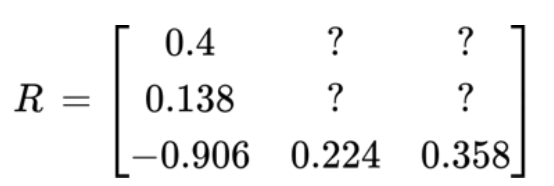

## Answer: (Manual)